In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#import markdown


# **I) PREPARING & CLEANING**

## Grouping the different sheets that ar part of the workbook

In [10]:
'''
# Ruta del archivo Excel de entrada
archivo_entrada = './data/raw data.xlsx'

# Cargar todas las hojas en un diccionario
hojas = pd.read_excel(archivo_entrada, sheet_name=None)

# Unir todas las hojas en un solo DataFrame
df_completo = pd.concat(hojas.values(), ignore_index=True)

# Guardar el DataFrame combinado en un nuevo archivo Excel
archivo_salida = './data/raw data mixed.xlsx'
df_completo.to_excel(archivo_salida, index=False)

print(f"Las hojas fueron combinadas exitosamente en {archivo_salida}")
'''

Las hojas fueron combinadas exitosamente en ./data/raw data mixed.xlsx


### Once is done, due errors by users, correction was need once every sheet is in a one workbook. Once is done, we get the file *"prepared data mixed.xlsx"*

In [15]:
path = './data/prepared data mixed.xlsx' 
df = pd.read_excel(path)

#df.head(5)
#df = df.dropna(axis = 1, how = 'all')

df = df.sort_values(by = 'Fecha recepcion')
df = df.reset_index(drop=True)

# UPPERCASE: every attribute
attributes = df.columns #df.iloc[:,:4].columns
for a in attributes:

    df[a] = df[a].str.upper()


# New attribute: year-month
df['año'] = df['Fecha recepcion'].str.split('-', expand = True)[0] 
df['año-mes'] = df['Fecha recepcion'].str.split('-', expand = True)[0] + '-' + df['Fecha recepcion'].str.split('-', expand = True)[1]

df.head(5)

,Numero OT,Fecha recepcion,Cliente,Tipo de ingreso,Responsable de ingreso,Descripcion del proyecto,Dimensiones [mm] anchoxlargoxalto,año,año-mes
0,5580,2021-03-02,ALL PACK,NUEVO,GUSTAVO MARTINEZ,KIT DE SELLOS,NaN,2021,2021-03
1,5581,2021-03-02,OLIVOS DEL VALLE,NUEVO,GUSTAVO MARTINEZ,CON COE,NaN,2021,2021-03
2,5579,2021-03-02,FRAU ALBORS,NUEVO,GUSTAVO MARTINEZ,CILINDRO HIDRÁULICO,NaN,2021,2021-03
3,5583,2021-03-03,SULLAIR,NUEVO,GUSTAVO MARTINEZ,CILINDRO ELEVACIÓN DE CUCHARA,NaN,2021,2021-03
4,5587,2021-03-03,NEWMONT,NUEVO,GUSTAVO MARTINEZ,CILINDRO BRAZO MANIPULADOR SANDVIK,NaN,2021,2021-03


In [16]:
df.to_csv('./data/prepared data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3053 entries, 0 to 3052
Data columns (total 9 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   Numero OT                          3053 non-null   object
 1   Fecha recepcion                    3053 non-null   object
 2   Cliente                            3051 non-null   object
 3   Tipo de ingreso                    3053 non-null   object
 4   Responsable de ingreso             3040 non-null   object
 5   Descripcion del proyecto           3049 non-null   object
 6   Dimensiones [mm] anchoxlargoxalto  1384 non-null   object
 7   año                                3053 non-null   object
 8   año-mes                            3053 non-null   object
dtypes: object(9)
memory usage: 214.8+ KB


## **II) EXPLORATION**

- ### **II.1) How many clients the company have?**

In [17]:
amount_clients = df['Cliente'].value_counts().shape[0]
N = 30
print(f"The company have {amount_clients} different clients")

top_client = df['Cliente'].value_counts().index[0]
print(f"The company that send most projects is: {top_client}")


print(f"The top {N} is:")
df['Cliente'].value_counts().head(N)

The company have 485 different clients
The company that send most projects is: MINA PIRQUITAS
The top 30 is:


Cliente
MINA PIRQUITAS         235
YMAD                   154
FINNING                 94
HOLCIM                  85
L'EQUIPE MONTEUR        81
AGV FALCON DRILLING     75
MICHELOTTI              69
NEWMONT                 63
CANTERAS DIQUECITO      54
GRÚAS MARTIN            52
AGV                     47
SULLAIR                 45
HDC                     43
CANTESUR                43
ALL PACK                43
ILASA                   40
CHEDIACK                38
HOLCIM MALAGUEÑO        38
VG                      37
MINERA LA ALUMBRERA     36
HORIZON                 35
SULLAIR                 35
CAPUTO                  31
CAMSA                   29
ASTORI                  29
JUMI                    29
MANSFIELD               29
VELADERO                28
DLS ARCHER LTD S.A      28
HIDROTEC                28
Name: count, dtype: int64

### We found:
- ### *There is 485 different clients*
- ### *Most common customer: Mina Pirquitas (~7.7% of all the projects)**

(*) Because, so far, the company count 3053 projects. Counting since the beginning of 2021.

- ### **II.2) How many *descriptive categories* the company have?**

### First, let's check how much individual categories are in the dataset

In [18]:
df['Descripcion del proyecto'] = df['Descripcion del proyecto'].fillna('otros').astype(str) # This is to avois NAN values for the label process
amount_unique_pj = df['Descripcion del proyecto'].unique().shape[0] # How many discription without any filter

print(f"The amount of different categories are, at least: {amount_unique_pj}")

amount_pj = df.shape[0]
ratio_unique_pj = round((amount_unique_pj/amount_pj)*100,1)
print(f"This means, that the whole set of projects {ratio_unique_pj} % of them, are unique")


The amount of different categories are, at least: 2130
This means, that the whole set of projects 69.8 % of them, are unique


### This means that, at this stage, that from all the 3053 projects, **~70%** are unique.
### Let's explore if we can define a more wade range of categories

In [19]:
df['Descripcion del proyecto'].value_counts().head(30)

Descripcion del proyecto
CILINDRO HIDRÁULICO                 100
PIEZAS PARA FABRICAR                 35
CILINDRO COE CORTO                   23
CILINDRO CHUCK DE CHINA              22
KIT DE SELLOS                        19
CILINDRO DE PRENSA                   19
CILINDRO COE                         19
CILINDRO PIE DE APOYO                17
GATO HIDRÁULICO                      17
CILINDRO DE DIRECCION                14
CILINDRO COE LARGO                   13
KIT DE SELLOS COE                    11
KIT DE SELLOS SEGUN MUESTRA          11
CILINDRO DE LEVANTE                  11
CILINDRO DE DIRECCIÓN                10
CILINDRO SUSPENSIÓN TRASERA           9
CILINDRO PARRILLA                     9
CILINDRO SVK TH 540                   8
CILINDROS DE TRASLACIÓN               8
CILINDRO DE PLATAFORMA                8
CILINDRO PULL DOWN                    8
CILINDRO NEUMÁTICO                    7
CILINDRO DE LEVANTE                   7
CILINDRO RETRO                        7
CILINDRO DEL ST

In [20]:
cylinders = round((df[df['Descripcion del proyecto'].str.contains("CILINDRO ")].shape[0] / df.shape[0])*100, 1)
print(f"The amount of projects, that are hydraulic cylinders are: {cylinders} %")

The amount of projects, that are hydraulic cylinders are: 49.4 %


### It is not surprise that the most common descriptive category is:
- #### *Hydraulic cylinders*: 49,4%

### Due this, let's devide the df into two categories:
- #### a) *Hidraulyc cylinders*
- #### b) *NOT hidraulic cylinders*: this Dcatecory (descriptive category) is important because show a whole different aspect of the bussines, new opportunities

### **II.2.a) Hidraulyc cylinders**

In [21]:
df_hydraulic = df[df['Descripcion del proyecto'].str.contains("CILINDRO ")]
#df[df['Descripcion del proyecto'].str.contains("CILINDRO ")]['Cliente'].value_counts().head(20)

amount_clients = df_hydraulic['Cliente'].value_counts().shape[0]
N = 20
print(f"The company have {amount_clients} clients for the hydraulic cylinder bussines")

top_client = df_hydraulic['Cliente'].value_counts().index[0]
print(f"The company that send the high amount of hydraulic cylinder projects is: {top_client}")

print(f"The top {N} is:")
df_hydraulic['Cliente'].value_counts().head(N)

The company have 297 clients for the hydraulic cylinder bussines
The company that send the high amount of hydraulic cylinder projects is: MINA PIRQUITAS
The top 20 is:


Cliente
MINA PIRQUITAS         113
NEWMONT                 59
L'EQUIPE MONTEUR        55
HOLCIM                  54
VG                      37
YMAD                    36
HDC                     33
AGV FALCON DRILLING     32
CAPUTO                  29
ASTORI                  28
VELADERO                27
MINERA LA ALUMBRERA     27
ALL PACK                27
HORIZON                 26
CANTERAS DIQUECITO      25
AGV                     22
WEG                     21
CANTESUR                21
SULLAIR                 20
DLS ARCHER LTD S.A      18
Name: count, dtype: int64

### **II.2.b) NOT Hidraulyc cylinders**

In [22]:
#df[df['Descripcion del proyecto'].str.contains("CILINDRO ") == False]['Cliente'].value_counts().head(10)
df_not_hydraulic = df[df['Descripcion del proyecto'].str.contains("CILINDRO ") == False]

amount_clients = df_not_hydraulic['Cliente'].value_counts().shape[0]
N = 20
print(f"The company have {amount_clients} clients for the hydraulic cylinder bussines")

top_client = df_not_hydraulic['Cliente'].value_counts().index[0]
print(f"The company that send the high amount of NOT hydraulic cylinder projects is: {top_client}")

print(f"The top {N} is:")
df_not_hydraulic['Cliente'].value_counts().head(N)

The company have 303 clients for the hydraulic cylinder bussines
The company that send the high amount of NOT hydraulic cylinder projects is: MINA PIRQUITAS
The top 20 is:


Cliente
MINA PIRQUITAS              122
YMAD                        118
FINNING                      77
MICHELOTTI                   59
AGV FALCON DRILLING          43
GRÚAS MARTIN                 39
ILASA                        36
HOLCIM                       31
CANTERAS DIQUECITO           29
HOLCIM MALAGUEÑO             28
CHEDIACK                     28
L'EQUIPE MONTEUR             26
AGV                          25
SULLAIR                      25
SULLAIR                      24
CERRO MORO                   23
CANTESUR                     22
JUMI                         21
PERFORACIONES IGLESIANAS     20
FINNING                      20
Name: count, dtype: int64

### What kind of projects we mean when we talk about **"NOT HYDRAULIC CYLINDERS"?**

In [23]:
df_not_hydraulic['Descripcion del proyecto'].value_counts().head(20)

Descripcion del proyecto
PIEZAS PARA FABRICAR                    35
KIT DE SELLOS                           19
GATO HIDRÁULICO                         17
KIT DE SELLOS COE                       11
KIT DE SELLOS SEGUN MUESTRA             11
CILINDROS DE TRASLACIÓN                  8
PUNTA PARA AFILAR                        6
ACTUADOR ROTATIVO PARKER                 6
BOMBA HIDRÁULICA                         6
MARTILLO HIDRÁULICO                      6
DISPOSITIVO PULIDORA                     5
METPOR_CILINDRO_DESPLAZ_30100-003-46     5
RESORTE DE NITROGENO T4SC                5
GATO DE SISTEMA BLOQUEO TELSUMITH        5
BOMBA MANUAL                             4
CONTENEDOR 482-3-62                      4
CAMISA COE CORTA P/ HERMANAR             4
otros                                    4
PRENSA HIDRAULICA                        4
BOMBA HIDRAULICA NIR                     4
Name: count, dtype: int64

In [24]:
not_cylinders_list = ['PIEZAS PARA FABRICAR', 'KIT DE SELLOS', 'GATO HIDRÁULICO']
not_cylinders = df_not_hydraulic.shape[0] #df[df['Descripcion del proyecto'].str.contains("CILINDRO ") == False].shape[0]

for nc in not_cylinders_list:

    #nc_amount = round((df[df['Descripcion del proyecto'].str.contains(nc)].shape[0] / not_cylinders)*100, 1)
    nc_amount = round((df_not_hydraulic[df_not_hydraulic['Descripcion del proyecto'].str.contains(nc)].shape[0] / not_cylinders)*100, 1)
    print(f"For the NOT CYLINDER CATEGORY, the amount of projects that are {nc} are: {nc_amount} %")

For the NOT CYLINDER CATEGORY, the amount of projects that are PIEZAS PARA FABRICAR are: 2.3 %
For the NOT CYLINDER CATEGORY, the amount of projects that are KIT DE SELLOS are: 8.4 %
For the NOT CYLINDER CATEGORY, the amount of projects that are GATO HIDRÁULICO are: 1.6 %


### **II.3) Whom are the responsable of the reception os this projects?**

- #### **In situ**: projects are leave on the company door
- #### **Office contact**: client communicate with thecnical office to point the job that need to be done ("Oficina Técnica")

### **II.3.a) Hidraulyc cylinders**

In [25]:
n_cylinders = df_hydraulic.shape[0]
n_cylinders_office = df_hydraulic[df_hydraulic['Responsable de ingreso'] == 'OFICINA TÉCNICA'].shape[0]
ratio = round((n_cylinders_office/n_cylinders)*100,1)

print(f"Technical office (\"OFICINA TÉCNICA\"), recive the {ratio}% of all HIDRAULIC CYLINDERS")

df_hydraulic['Responsable de ingreso'].value_counts()

Technical office ("OFICINA TÉCNICA"), recive the 22.4% of all HIDRAULIC CYLINDERS


Responsable de ingreso
GUILLERMO SANCHEZ      922
OFICINA TÉCNICA        337
GUSTAVO MARTINEZ       136
FERNANDO HEREDIA        67
FERNÁNDEZ MAURICIO      26
ROQUE MICANGELLI        13
LUIS MATA                3
Name: count, dtype: int64

### **II.3.b) NOT Hidraulyc cylinders**

In [45]:
n_cylinders = df_not_hydraulic.shape[0]
n_cylinders_office = df_not_hydraulic[df_not_hydraulic['Responsable de ingreso'] == 'OFICINA TÉCNICA'].shape[0]
ratio = round((n_cylinders_office/n_cylinders)*100,1)

print(f"Technical office (\"OFICINA TÉCNICA\"), recive the {ratio}% of all NOT HIDRAULIC CYLINDERS")

df_not_hydraulic['Responsable de ingreso'].value_counts()

Technical office ("OFICINA TÉCNICA"), recive the 44.4% of all NOT HIDRAULIC CYLINDERS


Responsable de ingreso
OFICINA TÉCNICA        687
GUILLERMO SANCHEZ      624
GUSTAVO MARTINEZ       127
FERNANDO HEREDIA        43
ROQUE MICANGELLI        20
MARCELO VARELA          17
FERNÁNDEZ MAURICIO      16
GUILLERMO SÁNCHEZ        1
LUIS MATA                1
Name: count, dtype: int64

- ### **II.4) PROJECTS VS TIME**

### Category by reception:

In [26]:
#df['año'] = df['Fecha recepcion'].str.split('-', expand = True)[0] 
#df['año-mes'] = df['Fecha recepcion'].str.split('-', expand = True)[0] + '-' + df['Fecha recepcion'].str.split('-', expand = True)[1]
category_by_description = ', '.join(list(df['Tipo de ingreso'].unique()))
print(f'The descriptive categories are: {category_by_description}')

df.head(4)

The descriptive categories are: NUEVO, RECLAMO, REINGRESO


,Numero OT,Fecha recepcion,Cliente,Tipo de ingreso,Responsable de ingreso,Descripcion del proyecto,Dimensiones [mm] anchoxlargoxalto,año,año-mes
0,5580,2021-03-02,ALL PACK,NUEVO,GUSTAVO MARTINEZ,KIT DE SELLOS,NaN,2021,2021-03
1,5581,2021-03-02,OLIVOS DEL VALLE,NUEVO,GUSTAVO MARTINEZ,CON COE,NaN,2021,2021-03
2,5579,2021-03-02,FRAU ALBORS,NUEVO,GUSTAVO MARTINEZ,CILINDRO HIDRÁULICO,NaN,2021,2021-03
3,5583,2021-03-03,SULLAIR,NUEVO,GUSTAVO MARTINEZ,CILINDRO ELEVACIÓN DE CUCHARA,NaN,2021,2021-03


### **II.4.a) All projects VS time**

In [27]:
# Projects by type

df_pj = df['año-mes'].value_counts().sort_index() # This returns a Series order by index
df_pj = df_pj.to_frame(name='ALL Projects') # This turns the series into a pandas dataframe

category_p = df['Tipo de ingreso'].unique()

for c in category_p:

    df_pj_c = df[df['Tipo de ingreso'] == c]['año-mes'].value_counts().sort_index() # This returns a Series
    df_pj_c = df_pj_c.to_frame(name= c) # This turns the series into a pandas dataframe

    df_pj = pd.concat([df_pj, df_pj_c], axis=1)

df_pj = df_pj.fillna(0)

df_pj.to_csv('./data/Projects_vs_time.csv')
df_pj.describe()

,ALL Projects,NUEVO,RECLAMO,REINGRESO
count,47.000000,47.000000,47.000000,47.000000
mean,64.957447,60.234043,1.382979,3.340426
std,18.585826,17.111162,1.973225,3.073566
min,29.000000,28.000000,0.000000,0.000000
25%,52.000000,49.000000,0.000000,1.000000
50%,66.000000,62.000000,1.000000,2.000000
75%,74.000000,69.500000,2.000000,4.500000
max,106.000000,102.000000,10.000000,15.000000


### Turning the previous dataset into percent:

In [28]:
category_p = df_pj.iloc[:,1:].columns
df_pj_p = pd.DataFrame()

for c in category_p:

    df_pj_p[c] = round((df_pj[c] / df_pj[df_pj.columns[0]])*100, 1)

df_pj_p.to_csv('./data/PercentProjects_vs_time.csv')
df_pj_p.describe()

,NUEVO,RECLAMO,REINGRESO
count,47.000000,47.000000,47.000000
mean,93.017021,2.074468,4.910638
std,4.758165,2.850207,4.041644
min,82.400000,0.000000,0.000000
25%,88.950000,0.000000,2.150000
50%,94.200000,1.200000,3.700000
75%,96.600000,3.200000,7.400000
max,100.000000,12.500000,16.500000


### **II.4.b) Hydraulic Cylinders Projects VS time**

In [29]:
# Projects by type: HYDRAULIC CYLINDERS

df_pj_h = df_hydraulic['año-mes'].value_counts().sort_index() # This returns a Series
df_pj_h = df_pj_h.to_frame(name='Hydraulic Cylinders Projects') # Series >>> pandas dataframe, the one to add the next ones.

category_p = df_hydraulic['Tipo de ingreso'].unique()

for c in category_p:

    df_pj_c = df_hydraulic[df_hydraulic['Tipo de ingreso'] == c]['año-mes'].value_counts().sort_index() # This returns a Series
    df_pj_c = df_pj_c.to_frame(name= c) # This turns the series into a pandas dataframe
    df_pj_h = pd.concat([df_pj_h, df_pj_c], axis=1)

df_pj_h = df_pj_h.fillna(0)
df_pj_h.to_csv('./data/HydraulicProjects_vs_time.csv')
df_pj_h.describe()

,Hydraulic Cylinders Projects,NUEVO,RECLAMO,REINGRESO
count,47.000000,47.000000,47.000000,47.000000
mean,32.063830,28.765957,0.872340,2.425532
std,11.085447,9.330205,1.568952,2.724643
min,11.000000,11.000000,0.000000,0.000000
25%,25.500000,22.500000,0.000000,1.000000
50%,32.000000,28.000000,0.000000,2.000000
75%,40.500000,37.000000,1.000000,3.500000
max,57.000000,45.000000,8.000000,14.000000


### hydraulic cylinder projects: by percent

In [30]:
category_p = df_pj_h.iloc[:,1:].columns
df_pj_h_p = pd.DataFrame()

for c in category_p:

    df_pj_h_p[c] = round((df_pj_h[c] / df_pj_h[df_pj_h.columns[0]])*100, 1)

df_pj_h_p.to_csv('./data/HydraulicProjectsPercent_vs_time.csv')
df_pj_h_p.describe()

,NUEVO,RECLAMO,REINGRESO
count,47.000000,47.000000,47.000000
mean,90.668085,2.670213,6.665957
std,6.871431,4.681087,6.169042
min,73.900000,0.000000,0.000000
25%,85.300000,0.000000,2.350000
50%,92.300000,0.000000,6.100000
75%,95.950000,3.800000,9.450000
max,100.000000,17.400000,24.600000


### **II.4.c) NOT Hydraulic Cylinders Projects VS time**

In [31]:
# Projects by type: HYDRAULIC CYLINDERS

df_pj_nh = df_not_hydraulic['año-mes'].value_counts().sort_index() # This returns a Series
df_pj_nh = df_pj_nh.to_frame(name='NOT Hydraulic Cylinders Projects') # Series >>> pandas dataframe, the one to add the next ones.

category_p = df_not_hydraulic['Tipo de ingreso'].unique()

for c in category_p:

    df_pj_c = df_not_hydraulic[df_not_hydraulic['Tipo de ingreso'] == c]['año-mes'].value_counts().sort_index() # This returns a Series
    df_pj_c = df_pj_c.to_frame(name= c) # This turns the series into a pandas dataframe
    df_pj_nh = pd.concat([df_pj_nh, df_pj_c], axis=1)

df_pj_nh = df_pj_nh.fillna(0)
df_pj_nh.to_csv('./data/NotHydraulicProjects_vs_time.csv')
df_pj_nh.describe()

,NOT Hydraulic Cylinders Projects,NUEVO,RECLAMO,REINGRESO
count,47.000000,47.000000,47.000000,47.000000
mean,32.893617,31.468085,0.510638,0.914894
std,11.944135,11.747065,0.804129,1.017879
min,14.000000,13.000000,0.000000,0.000000
25%,26.000000,24.000000,0.000000,0.000000
50%,31.000000,29.000000,0.000000,1.000000
75%,38.000000,37.000000,1.000000,2.000000
max,73.000000,71.000000,3.000000,4.000000


### NOT hydraulic cylinder projects: by percent

In [32]:
category_p = df_pj_nh.iloc[:,1:].columns
df_pj_nh_p = pd.DataFrame()

for c in category_p:

    df_pj_nh_p[c] = round((df_pj_nh[c] / df_pj_nh[df_pj_nh.columns[0]])*100, 1)

df_pj_nh_p.to_csv('./data/NotHydraulicProjectsPercent_vs_time.csv')
df_pj_nh_p.describe()

,NUEVO,RECLAMO,REINGRESO
count,47.000000,47.000000,47.000000
mean,95.561702,1.476596,2.955319
std,4.873779,2.482216,3.551351
min,81.200000,0.000000,0.000000
25%,92.750000,0.000000,0.000000
50%,96.400000,0.000000,1.900000
75%,100.000000,2.650000,5.300000
max,100.000000,10.700000,12.500000


## **III) PLOTTING**

### We are going to plot: All projects/ Hydraulic Cylinder/ NOT Hydraulic Cylinder VS Time

- ### By absolute amount
- ### By percent

## **III.1) By absolute amount**

"\n# Aditional parameters -------------\nplt.xticks(rotation=45)\nplt.legend()\nplt.xlabel('X label')\nplt.ylabel('Y label')\n#plt.ylim(-10,40)\nplt.show()\n"

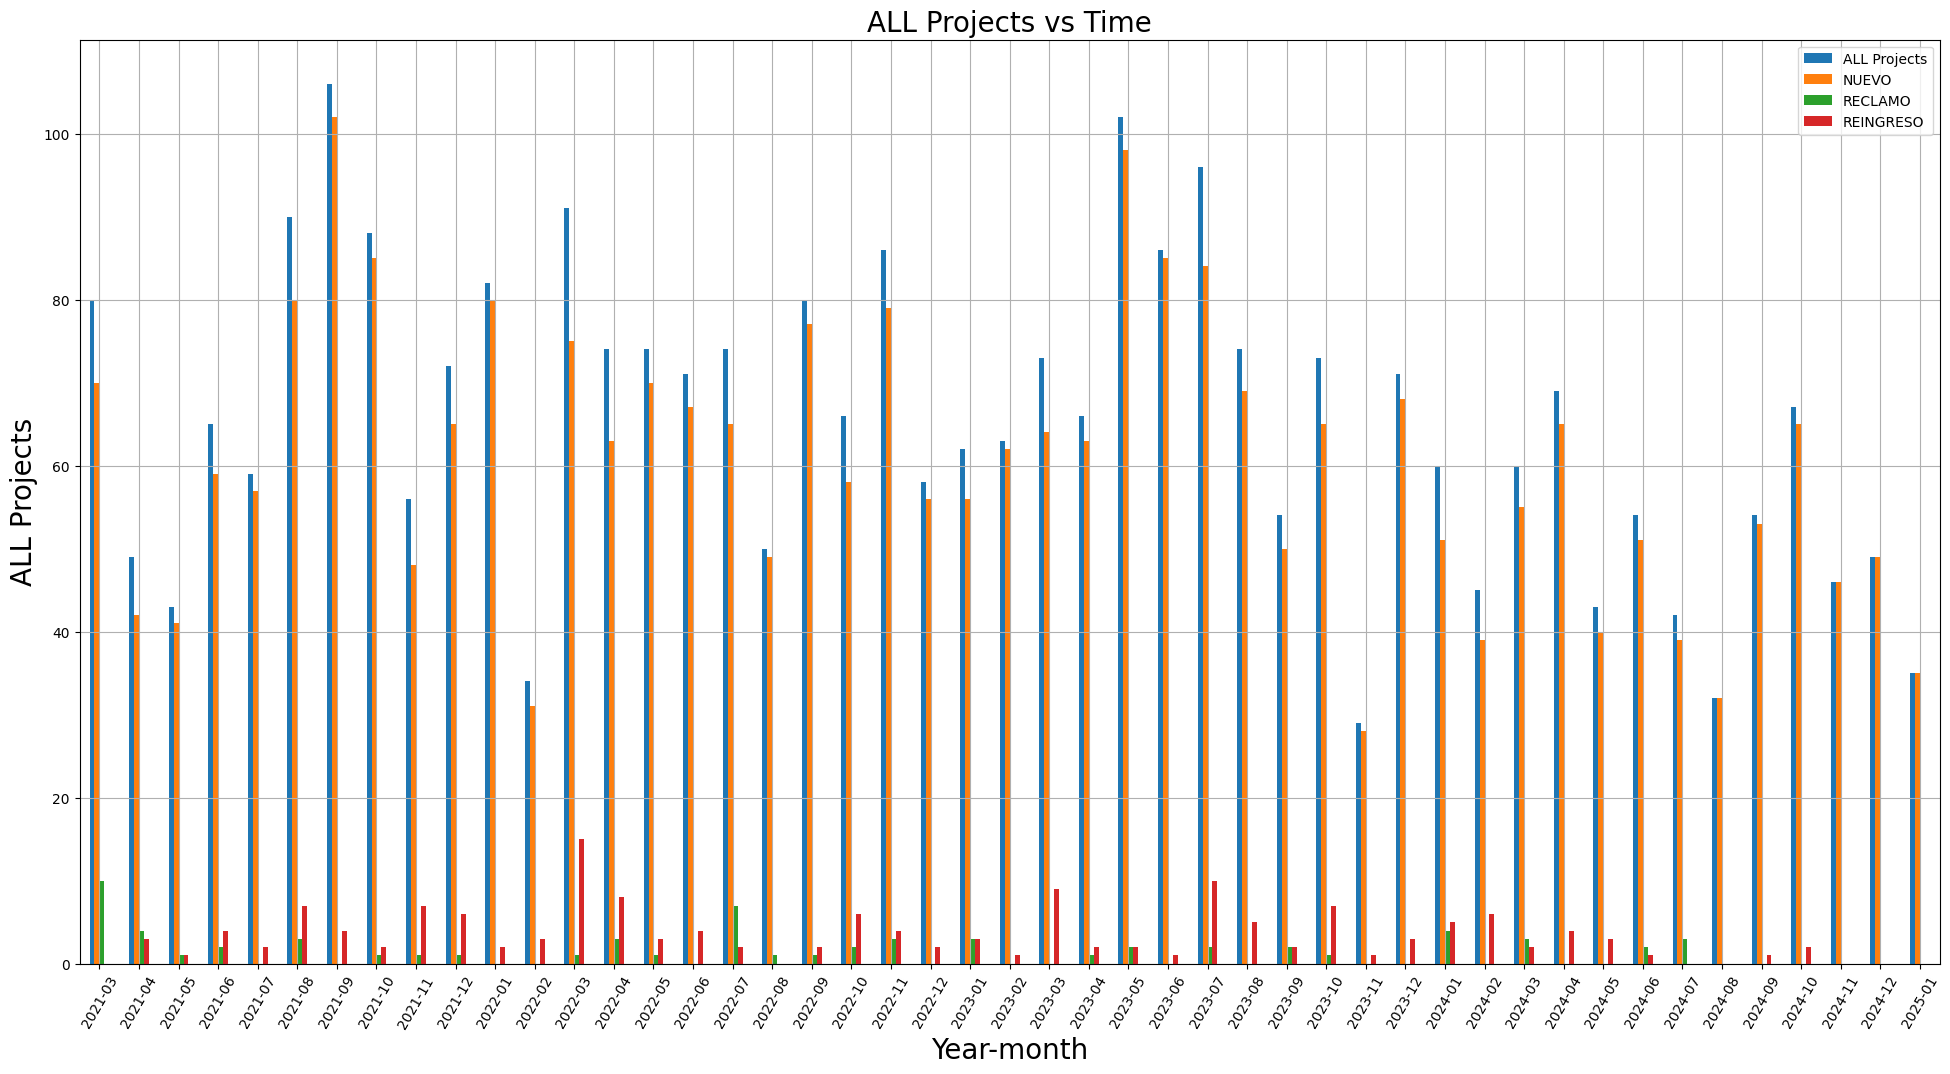

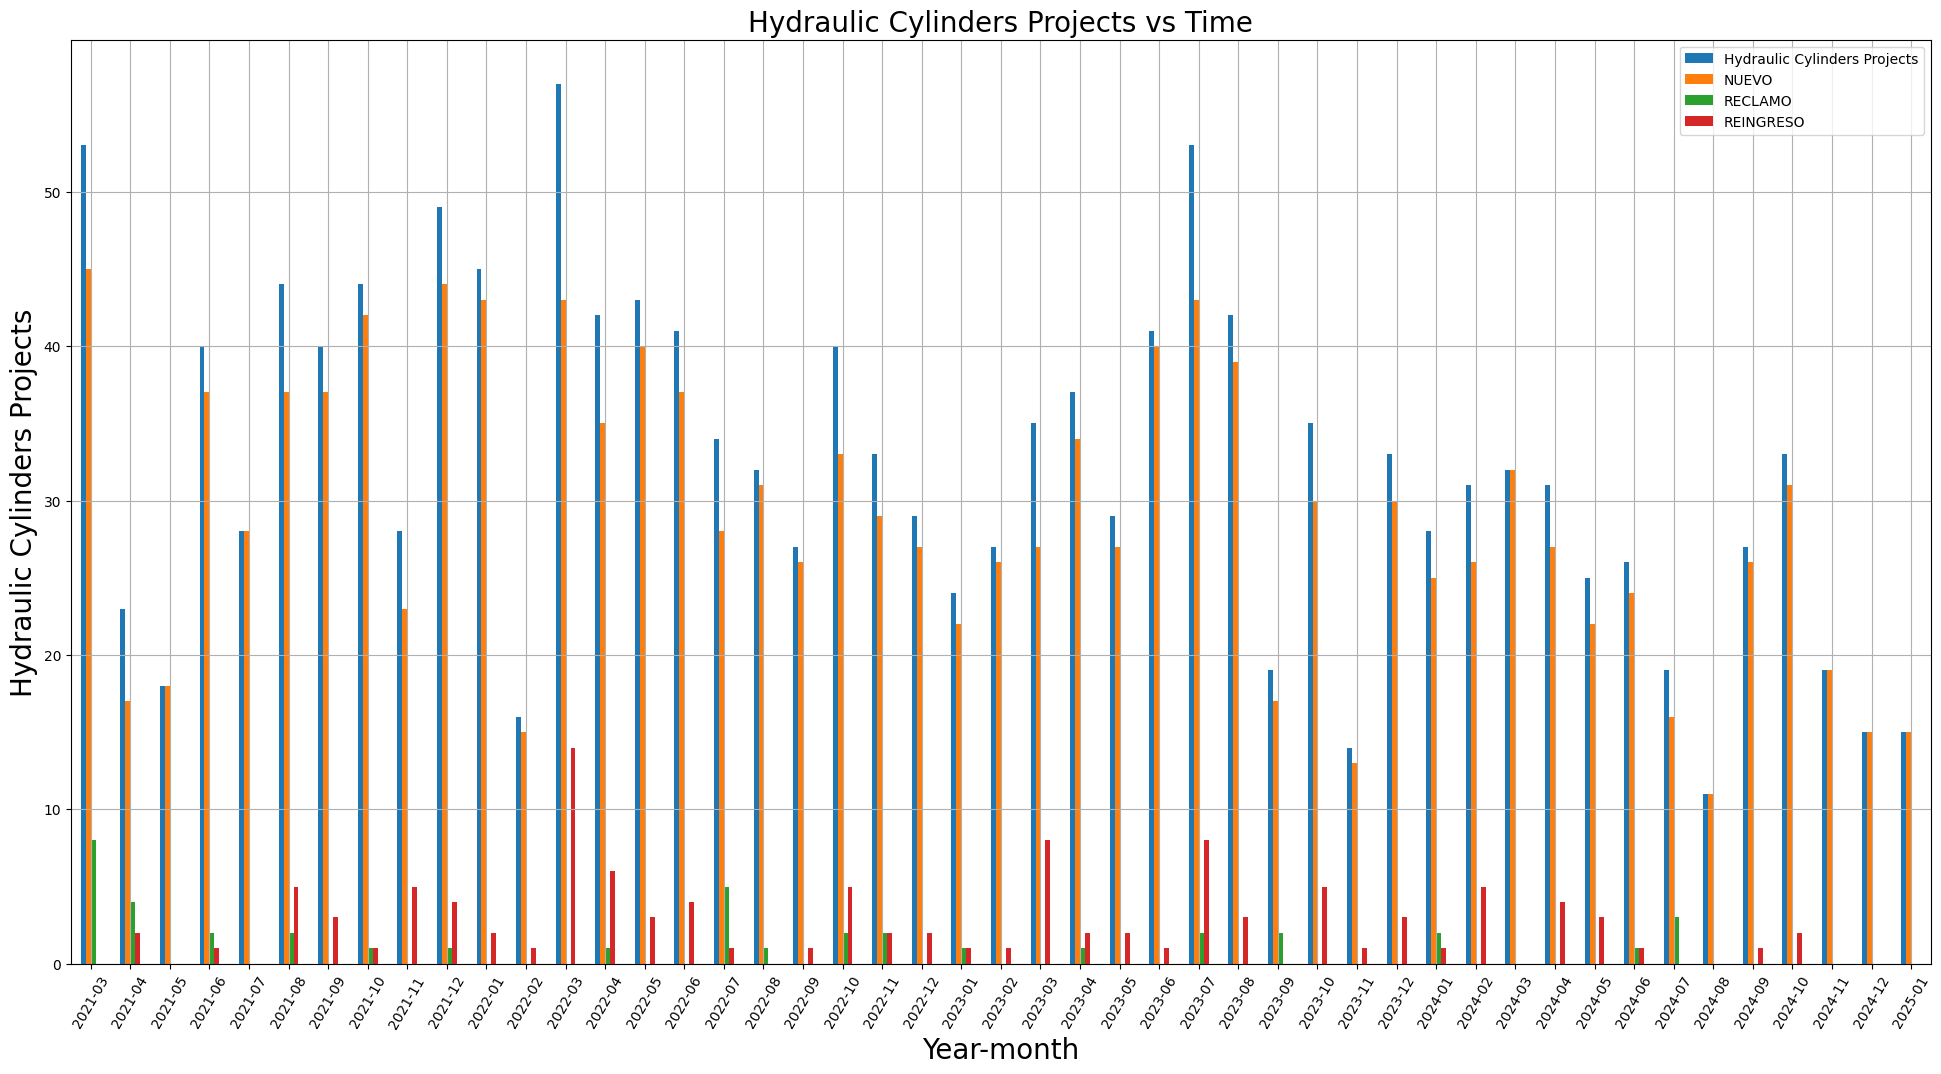

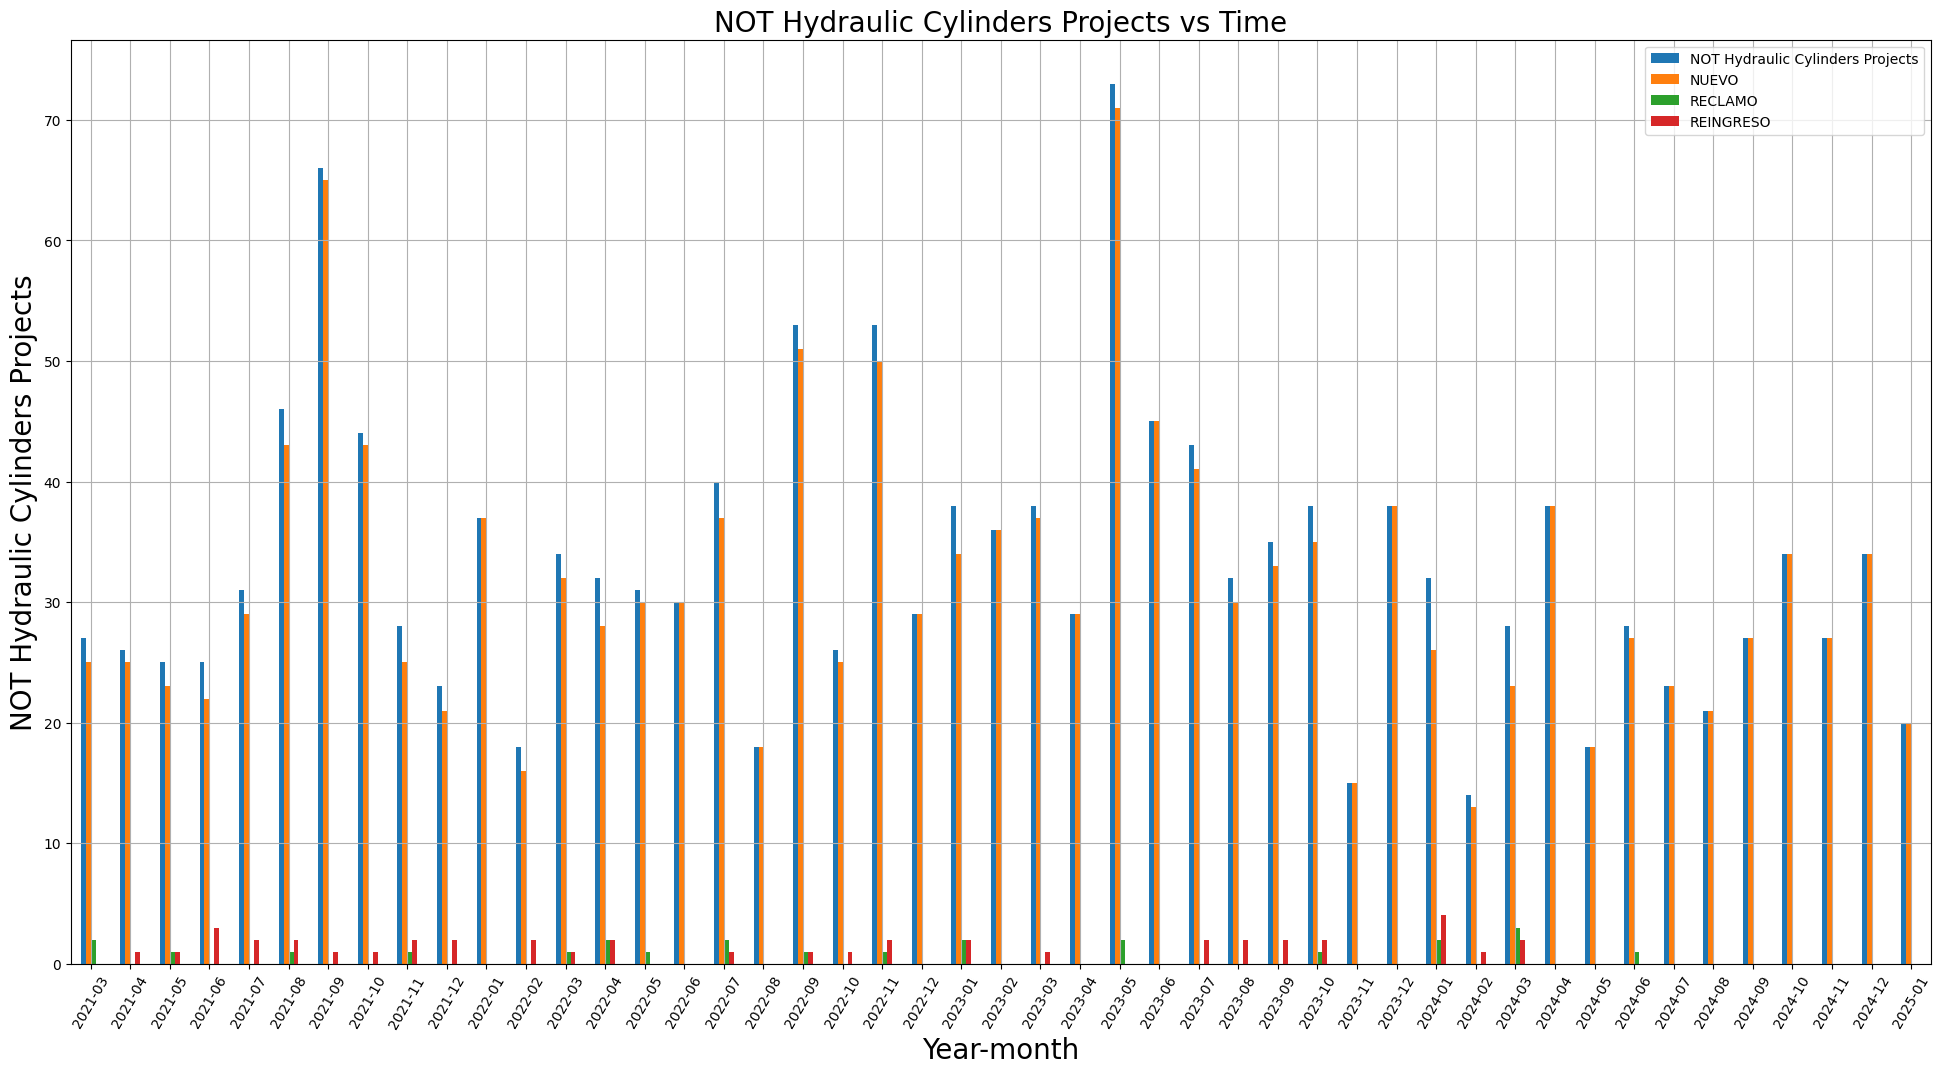

In [34]:
list_pj = [df_pj, df_pj_h, df_pj_nh]
#list_pj_p = [df_pj_p, df_pj_h_p, df_pj_nh_p]

for project in list_pj:
    
    project.plot(figsize = (24,12), kind = 'bar', grid = True, rot = 60)
    plt.xlabel('Year-month', size = 20)
    plt.ylabel(project.columns[0], size = 20)
    plt.title(project.columns[0] + ' vs Time', size = 20)

    # Horizontal line
    #yline = round(df_pj['TOTAL'].mean(), 0)
    #plt.axhline(y=yline, color='r', linestyle='-')

'''
# Aditional parameters -------------
plt.xticks(rotation=45)
plt.legend()
plt.xlabel('X label')
plt.ylabel('Y label')
#plt.ylim(-10,40)
plt.show()
'''

